# **Introducción a Montecarlo**

## Simulación de Montecarlo

*Método Montecarlo*
- Definir un dominio de posibles entradas
- Generar entradas al azar a partir de una distribución de probabilidad en el dominio
- Realizar un cálculo determinista en las entradas
- Agregar los resultados

### Estimación de integrales definidas

El siguiente código es un ejemplo de cómo podríamos estimar una integral definida usando Montecarlo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Definición de la función a integrar e intervalo de integración

In [ ]:
# Límites de integración
a=0
b=2

def funcion_a_integrar(x):
  return x**2

N= 10000

x= np.random.uniform(a,b,N)
y= np.random.uniform(funcion_a_integrar(a), funcion_a_integrar(b), N)

print(x)

[0.37676728 1.0558263  1.74530079 ... 1.50723946 1.81067188 0.07244154]


In [ ]:
print(y)

[3.51034884 0.2784321  3.3238282  ... 2.61118187 0.10858993 0.42285633]


In [ ]:
n_bajo_curva = np.sum(y < funcion_a_integrar(x))
respuesta_de_integral = (b-a) * (funcion_a_integrar(b) - funcion_a_integrar(a)) * n_bajo_curva / N
print(respuesta_de_integral)

2.7072


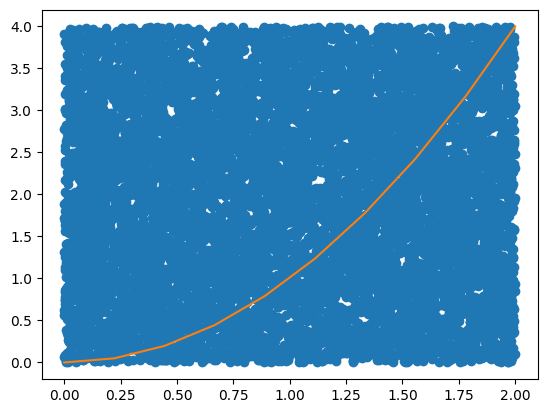

In [ ]:
plt.plot(x, y, 'o')
plt.plot(np.linspace(a,b,10), funcion_a_integrar(np.linspace(a,b,10)))
plt.show()

**PI BUFFON**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
n_simulaciones : numero de simulaciones de montecarlo
L: Largo de las agujas a soltar
d : Distancia entre las líneas

In [ ]:
def estimar_pi_buffon(n_simulaciones=100, L=1 ,d=2):
  cruces = 0

  for _ in range(n_simulaciones):

    # Simulas dónde cae el centro en una altura aleatoria dentro de una línea
    # Aleatorio uniforme continuo entrre 0 y d/2
    centro_de_aguja = np.random.uniform(0,d/2)

    # Simulas el ángulo con el que cae la aguja
    theta = np.random.uniform(0,np.pi/2)

    # La aguja cruzó?
    if (L/2) * np.sin(theta) >= centro_de_aguja:
      cruces += 1

    # Calculas pi
    # Fórmula alternativa : (2 * número de líneas * largo de aguja) / distancia entre líneas * agujas que cruzan)
  pi_estimado = (2 * n_simulaciones * L) / (d * cruces)
  return pi_estimado

pi_estimado = estimar_pi_buffon()
print(pi_estimado)

3.225806451612903


Estimar pi usando un círculo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def B_círculo(x,y):
    return x**2+y**2<=1

In [ ]:
x=np.array([0,1,1])
y=np.array([0,0,1])
B_círculo(x,y)

array([ True,  True, False])

In [ ]:
N=20000
ux=np.random.uniform(-1,1,N)
uy=np.random.uniform(-1,1,N)
B=B_círculo(ux,uy)
th=B.mean()
th

np.float64(0.7847)

In [ ]:
AD=th*(1-(-1))*(1-(-1))   # th (Área_del_rectángulo)
AD

np.float64(3.1388)

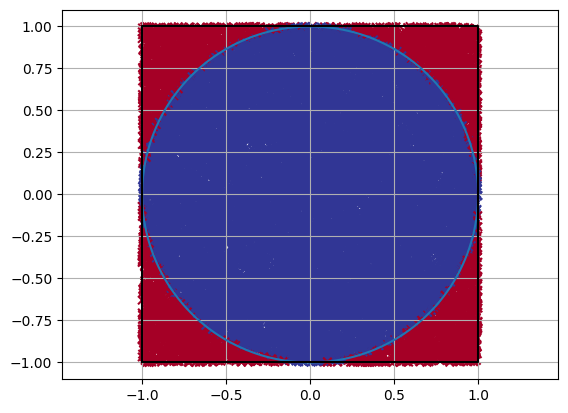

In [ ]:
plt.scatter(ux,uy,c=B_círculo(ux,uy), marker='x',cmap='RdYlBu')  # Puntos usados en el cálculo del área

# Acá graficamos el círculo
x=np.linspace(-1,1,1000)
y1=np.sqrt(1-x**2)
y2=-np.sqrt(1-x**2)
plt.plot(x, y1,x,y2,'C0',[-1,1,1,-1,-1],[-1,-1,1,1,-1],'k')
plt.axis('equal')
plt.grid()